<h2>Hand Written Digits </h2>

<h3>download/load dataset for  
#   https://yann.lecun.com/exdb/mnist/  </h3>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [3]:
#import necessary libraries


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Dropout
from tensorflow.keras import Sequential

#data are 4-dimention then do (())- double parentesis
((x_train,y_train)),((x_test,y_test))=keras.datasets.mnist.load_data()


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
#convert into float32
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [7]:
reshaped=784
x_train=x_train.reshape(60000,reshaped)
x_test=x_test.reshape(10000,reshaped)

In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [9]:
x_train /=255
x_test /=255

In [10]:
print(x_train.shape[0])

60000


In [11]:
print(x_test.shape[0])

10000


In [12]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


In [14]:
model=Sequential()


In [15]:
model.add(Dense(10,activation='softmax'))
#model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss=['categorical_crossentropy'],metrics=['accuracy'])

In [16]:
traning=model.fit(x_train,y_train,batch_size=128,epochs=4)

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7244 - loss: 1.0416
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8963 - loss: 0.3810
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9106 - loss: 0.3261
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.3031


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
print(traning.history.keys())


dict_keys(['accuracy', 'loss'])


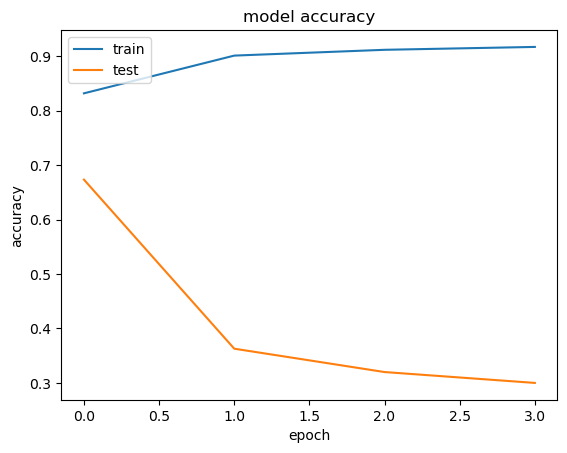

In [18]:
# plot a accuracy and loss

plt.plot(traning.history['accuracy'])
plt.plot(traning.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

In [20]:
#evalution

test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("Accuracy :",test_accuracy)
print("loss: ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9089 - loss: 0.3235
Accuracy : 0.920199990272522
loss:  0.2843015491962433


In [21]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regula

In [22]:
## improve the model
# add multiple hidden layer 
#add dropout to avoid over fitng

import tensorflow as tf
model2=tf.keras.Sequential()
n=512 # 512 hidden layers


In [23]:
model2.add(Dense(n,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(n,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))


In [24]:
model2.compile(optimizer='Adam',loss=['categorical_crossentropy'],metrics=['accuracy'])
                                     

In [25]:
train2=model2.fit(x_train,y_train,batch_size=64,epochs=10)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8864 - loss: 0.3825
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9694 - loss: 0.0990
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9764 - loss: 0.0716
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9816 - loss: 0.0564
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9845 - loss: 0.0474
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9871 - loss: 0.0395
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9889 - loss: 0.0357
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9904 - loss: 0.0300
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9910 - loss: 0.0271
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9904 - loss: 0.0281


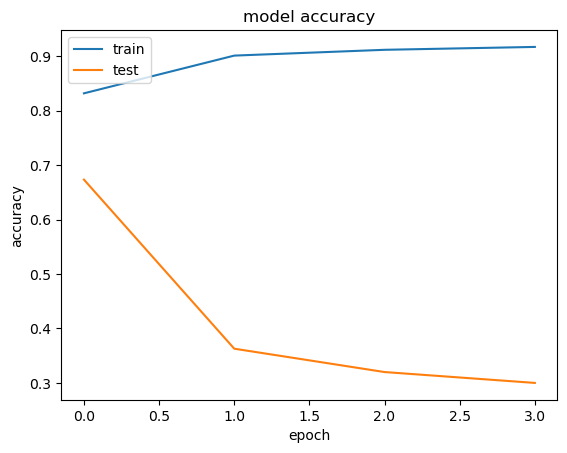

In [26]:
#plot a accuracy and loss

plt.plot(traning.history['accuracy'])
plt.plot(traning.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [27]:
#eavluate the model to check accuracy and loss
test_loss,test_accuracy=model2.evaluate(x_test,y_test)
print("Accuracy: ",test_accuracy)
print("loss ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.0840
Accuracy:  0.983299970626831
loss  0.06455154716968536
